<a href="https://colab.research.google.com/github/Akhil099/cs666student/blob/main/CS666_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

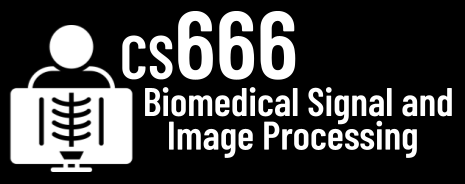
#Assignment 4

In [ ]:
# NAME:B.Akhil

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 33.7 MB/s eta 0:00:00


In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs666.org/data/xray/ with the wget command!
# Note: Please use the forwarded dropbox link and change dl=0 to dl=1!
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
!wget -O xray.zip "https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1"

--2024-04-05 01:34:19--  https://www.dropbox.com/s/2ca2889o2ql8n4e/xray.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2ca2889o2ql8n4e/xray.zip [following]
--2024-04-05 01:34:19--  https://www.dropbox.com/s/dl/2ca2889o2ql8n4e/xray.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc153bb9c24bc30896379fffd924.dl.dropboxusercontent.com/cd/0/get/CQaSz3e4190MS3pn05aikMEsQfnC28qpWVohoETy3ySKvv7et9MWDGOWlcOOA4oLZHRebNDgGGCLAegso_5UfQ-0iRjZlTFxqpu30WoycUjXl3CqJljjYNS8Ocwni2f7_AqEKW0UjLc4yGo-3UZ0WbVR/file?dl=1# [following]
--2024-04-05 01:34:20--  https://uc153bb9c24bc30896379fffd924.dl.dropboxusercontent.com/cd/0/get/CQaSz3e4190MS3pn05aikMEsQfnC28qpWVohoETy3ySKvv7et9MWDGOWlcOOA4oLZHRebNDgGGCLAegso_5UfQ-0iRjZlTFxqpu30WoycUjXl3Cq

In [ ]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'
def get_file_paths(directory):
    file_names = os.listdir(directory)
    full_paths = [os.path.join(directory, file_name) for file_name in file_names]
    return full_paths

# Get file paths for each category
normal_files = get_file_paths(NORMAL_DIR)
pneumonia_files = get_file_paths(PNEUMONIA_DIR)
covid_files = get_file_paths(COVID_DIR)

# Example: print the first few file paths for each category
print("Normal files:", normal_files[:5])
print("Pneumonia files:", pneumonia_files[:5])
print("Covid files:", covid_files[:5])

Normal files: ['normal/IM-0162-0001.jpeg', 'normal/IM-0170-0001.jpeg', 'normal/IM-0225-0001.jpeg', 'normal/IM-0117-0001.jpeg', 'normal/IM-0203-0001.jpeg']
Pneumonia files: ['pneumonia/person9_bacteria_41.jpeg', 'pneumonia/person24_bacteria_110.jpeg', 'pneumonia/person2_bacteria_4.jpeg', 'pneumonia/person5_bacteria_19.jpeg', 'pneumonia/person24_bacteria_112.jpeg']
Covid files: ['covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg', 'covid/extubation-4.jpg', 'covid/covid-19-pneumonia-22-day1-pa.png', 'covid/ciaa199.pdf-001-b.png', 'covid/16660_4_1.jpg']


In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

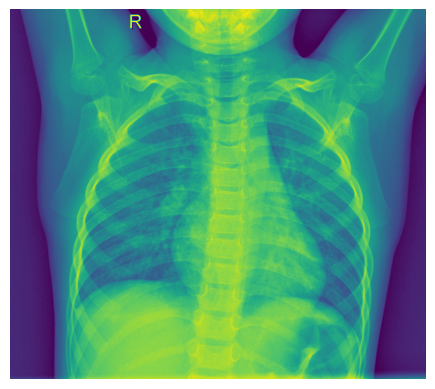

Dimensions: (1858, 2090)


In [ ]:
# TODO: YOUR CODE
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.show()

print(f"Dimensions: {img.shape}")

**Task 2:** Let's do some data wrangling and more visualization! [30 Points]

In [ ]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image


In [ ]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER
#A1)The first operation is the prelocation of Numpy array for efficiency and storing the images of uniform size in this case is the dimensions of 300*300
# TODO: Operation 2) YOUR ANSWER
#A2)Conversion of the images into a grayscale images which will help us to reduce the image information that is stroed for processing the images by eliminating the color information
# TODO: Operation 3) YOUR ANSWER
#A3)resizing the images to a uniform dimensions fof 300 * 300 and padding them with zeros in the situations where the images are not a perfect square

Axes(0.125,0.53;0.133621x0.35)
normal/IM-0189-0001.jpeg
()
Axes(0.285345,0.53;0.133621x0.35)
normal/IM-0119-0001.jpeg
()
Axes(0.44569,0.53;0.133621x0.35)
normal/IM-0170-0001.jpeg
()
Axes(0.606034,0.53;0.133621x0.35)
normal/IM-0156-0001.jpeg
()
Axes(0.766379,0.53;0.133621x0.35)
normal/IM-0160-0001.jpeg
()
pneumonia/person23_bacteria_91.jpeg
()
pneumonia/person8_bacteria_37.jpeg
()
pneumonia/person23_bacteria_84.jpeg
()
pneumonia/person20_bacteria_64.jpeg
()
pneumonia/person25_bacteria_114.jpeg
()


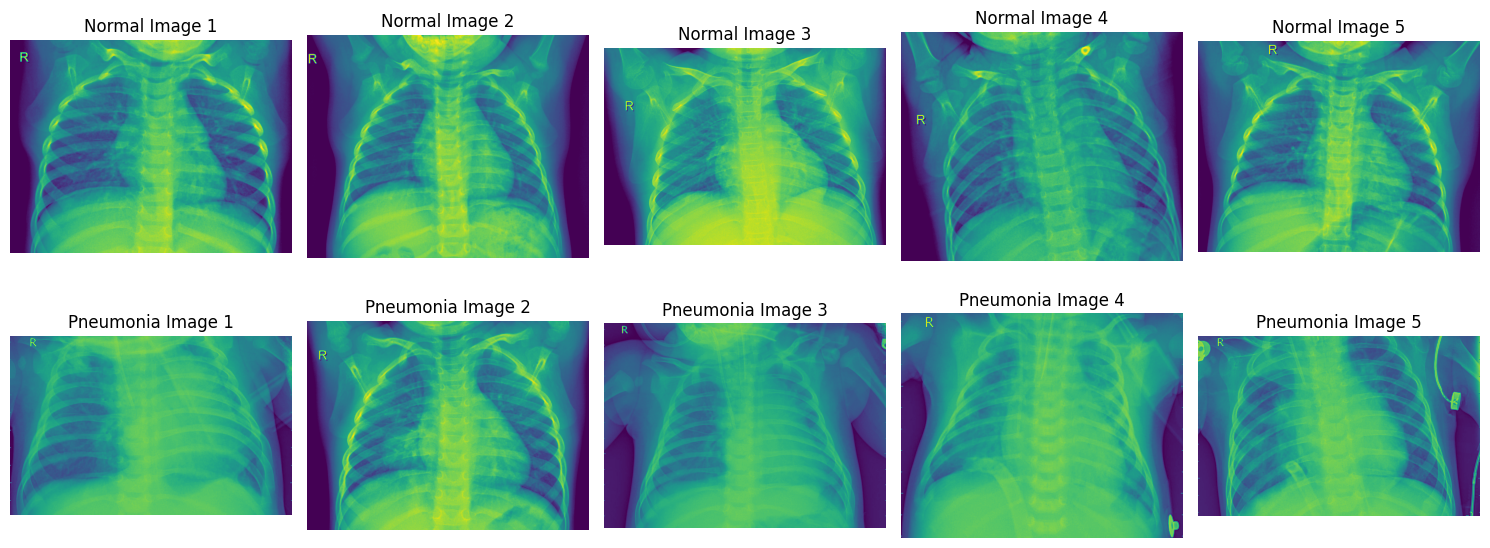

In [84]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

import matplotlib.pyplot as plt

def process(filename):
    """Read and display an image file."""
    print(filename)
    print(shape(filename))
    image = mh.imread(filename)
    plt.imshow(image)
    plt.axis('off')  # Hide axis labels for clarity

# # Assuming `normal_images` and `pneumonia_images` are lists of filenames
normal_images = ['normal/IM-0189-0001.jpeg', 'normal/IM-0119-0001.jpeg', 'normal/IM-0170-0001.jpeg', 'normal/IM-0156-0001.jpeg', 'normal/IM-0160-0001.jpeg']
# # print(normal_images)
pneumonia_images = ['pneumonia/person23_bacteria_91.jpeg', 'pneumonia/person8_bacteria_37.jpeg', 'pneumonia/person23_bacteria_84.jpeg', 'pneumonia/person20_bacteria_64.jpeg', 'pneumonia/person25_bacteria_114.jpeg']
# # print(normal_images)

# # Set up the figure size and layout
plt.figure(figsize=(15, 6))

# # Display the first 5 normal images
for i, filename in enumerate (normal_images):
    print(plt.subplot(2, 5, i+1))  # 2 rows, 5 columns, current index
    plt.title('Normal Image {}'.format(i + 1))
    process(filename)


# # Display the first 5 pneumonia images
for i, filename in enumerate (pneumonia_images):
    plt.subplot(2, 5, i+6)  # 2 rows, 5 columns, current index adjusted for second row
    plt.title('Pneumonia Image {}'.format(i + 1))
    process(filename)

plt.tight_layout()
plt.show()

In [ ]:
# TODO: YOUR CODE

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [ ]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [ ]:
# TODO: Please create the y_train vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
import numpy as np

y_train = np.array([0] * TRAINING_COUNT + [1] * TRAINING_COUNT + [2] * TRAINING_COUNT)# TODO
print(y_train)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [ ]:
# TODO: Please create the y_test vector with 0 for a normal image,
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
import numpy as np

y_test = np.array([0] * TESTING_COUNT + [1] * TESTING_COUNT + [2] * TESTING_COUNT)# TODO
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


**Task 4:** Let's train and evaluate the Random Forest! [30 Points]

In [ ]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()
print(clf)
print("n_estimators:", clf.n_estimators)
print("max_depth:", clf.max_depth)
print("min_samples_split:", clf.min_samples_split)
# Continue for other parameters you're interested i

RandomForestClassifier()
n_estimators: 100
max_depth: None
min_samples_split: 2


In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.
# The RandomForestClassifier works by building a collection of decision trees trained on various sub-samples of the dataset and then making predictions by aggregating the results of these individual trees. Here’s the gist of how it operates:

# Multiple Decision Trees: It constructs numerous decision trees during training time. Each tree is trained on a random subset of the data samples (with replacement), known as bootstrap sampling. This introduces variability among the trees.
# Feature Subset Selection: For each split in the training of the trees, a random subset of the features is considered. This further increases diversity among the trees and contributes to the robustness of the model by reducing the risk of overfitting on the training data.
# Majority Voting: When making predictions, each tree in the forest votes for a class. The RandomForestClassifier then selects the class that receives the majority of the votes as the final prediction for classification tasks.
# Error Reduction and Overfitting Control: By averaging out the biases and variances of the individual trees and through the random selection of both samples and features, Random Forests tend to reduce the risk of overfitting, leading to better generalization on unseen data.
# Tuning Parameters: Parameters like the number of trees in the forest (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split an internal node (min_samples_split) can be adjusted to optimize performance.
# The RandomForestClassifier is particularly valued for its versatility, ease of use, and robust performance across a wide range of classification tasks, making it a popular choice for machine learning practitioners.

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: YOUR ANSWER
#Yes, from a numerical standpoint, achieving 100% accuracy on a test set means the model has perfectly classified all test images according to the provided labels.
#In real-world applications, especially in medical diagnostics, such accuracy is highly desirable but rare.
# I am potentailly suprised for several reasons
# Overfitting: In machine learning, especially with complex models like Random Forests, a 100% test accuracy could indicate overfitting, where the model has learned to perfectly classify the training data, including its noise and outliers, rather than generalizing from the underlying patterns. However, overfitting is more likely when the model performs exceptionally well on the training data but poorly on unseen test data, which does not seem to be the case here based on the provided information.
# Data Simplicity: If the data is very distinct and simple (i.e., the features very clearly differentiate between classes without much overlap), a high accuracy is less surprising. In the context of X-ray images for normal, pneumonia, and COVID cases, while differences exist, they can be subtle and subject to interpretation, making such clear-cut accuracy unexpected.
# Small Dataset Size: With a relatively small dataset (180 images for training and 120 for testing), there's a risk that the model's apparent high performance is due to the specific selection of images rather than its ability to generalize. It's crucial to test the model on a larger and more diverse set of images to truly assess its performance.
# Preprocessing and Feature Extraction: The preprocessing steps (flattening, normalization) and lack of complex feature extraction might not usually be sufficient for complex pattern recognition in medical images, making high accuracy surprising. However, the simplicity of these steps also means there's less room for introducing errors that might reduce accuracy.
# Balanced Dataset: The balanced nature of the dataset might help improve model accuracy since the model is equally exposed to all classes during training, reducing the risk of biases toward more frequent classes. Nonetheless, achieving perfect balance does not guarantee perfect accuracy.


**Task 5:** Now, let's decrease the number of trees! [10 Points]

In [ ]:
# How many trees are used in Task 4?

In [ ]:
# TODO: YOUR ANSWER
#There are 100 trees that are used as indicated from this n_estimators: 100

In [ ]:
# Now, please use a single tree and observe the testing performance.


In [ ]:
# TODO: YOUR CODE
clf.n_estimators = 1
fitted = clf.fit( X_train, y_train )
clf.score( X_test, y_test )

0.9166666666666666

In [ ]:
# Are you surprised?


In [ ]:
# TODO: YOUR ANSWER
#I am quite suprised with the result. The high accuracy with a single tree is surprising, it reflects well oin the dataset's quality abd the effective preprocessing steps.However, it's also a reminder of the importance of understanding the specific characteristics of your data and the context in which your model will be applied. Testing with different model complexities can provide insights into what's necessary for good performance and what might just be adding complexity without benefit.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [81]:
# TODO: YOUR CODE AND YOUR ANSWER
from sklearn.metrics import accuracy_score, classification_report

remaining_covid_images = data[2][100:]  # Selecting the remaining 99 images

# Initialize the array for these images
X_covid_remaining = np.zeros((len(remaining_covid_images), 300*300), dtype=np.float32)

# Populate the array
for i, image in enumerate(remaining_covid_images):
    image = image.ravel()  # Flatten the image
    image /= image.max()   # Normalize the image
    X_covid_remaining[i] = image

# Since all these images are COVID, the labels should be 2 (assuming 0=Normal, 1=Pneumonia, 2=COVID)
y_covid_remaining_true = np.array([2] * len(remaining_covid_images))
covid_predictions = clf.predict(X_covid_remaining)

accuracy = accuracy_score(y_covid_remaining_true, covid_predictions)
report = classification_report(y_covid_remaining_true, covid_predictions, target_names=['Normal', 'Pneumonia', 'COVID'])

print(f"Accuracy on remaining COVID images: {accuracy}")
print(report)



Accuracy on remaining COVID images: 0.8484848484848485
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
   Pneumonia       0.00      0.00      0.00         0
       COVID       1.00      0.85      0.92        99

    accuracy                           0.85        99
   macro avg       0.33      0.28      0.31        99
weighted avg       1.00      0.85      0.92        99



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

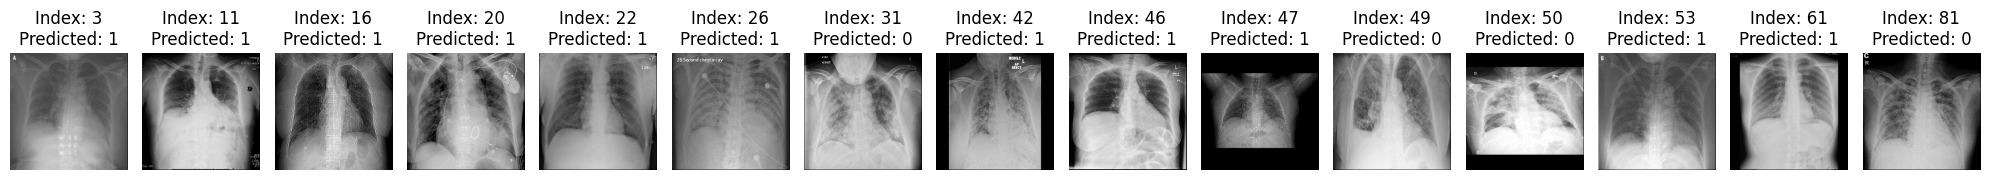

In [82]:
# TODO: YOUR CODE AND YOUR ANSWER
import matplotlib.pyplot as plt

# Step 2: Identify Misclassified Images
misclassified_indices = np.where(covid_predictions != y_covid_remaining_true)[0]

# Step 3: Display Misclassified Images
fig, axes = plt.subplots(nrows=1, ncols=len(misclassified_indices), figsize=(20, 4))
if len(misclassified_indices) == 1:  # If there's only one misclassified image, we need to handle axes array differently
    axes = [axes]

for ax, index in zip(axes, misclassified_indices):
    image = X_covid_remaining[index].reshape(300, 300)  # Reshape back to original dimensions
    ax.imshow(image, cmap='gray')
    ax.title.set_text(f'Index: {index}\nPredicted: {covid_predictions[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:


# Step 4: Analyze Possible Reasons for Misclassification
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw